In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_data = pd.merge(clinical_data, mouse_data, on='Mouse ID',how = 'left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_resp = combined_data.groupby(['Drug','Timepoint'])
mean_tumor_vol = tumor_resp['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
mtv_data = mean_tumor_vol.to_frame()
# Preview DataFrame
mtv_data.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_vol = tumor_resp['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
time_df = se_tumor_vol.to_frame().reset_index()

# Preview DataFrame
time_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
munged_data = mtv_data.unstack(level = 'Drug')
# convert multi index to single index to get desired columns 
munged_data.columns = munged_data.columns.get_level_values(1)
munged_data = munged_data[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]
# Preview that Reformatting worked
munged_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


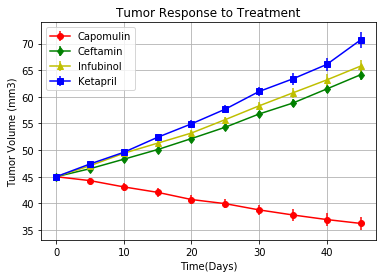

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
x_axis = munged_data.index
capomulin_axis = munged_data['Capomulin'].values
#lineplot = plt.plot(x_axis, capomulin_axis, marker ='o', color='R', label="Capomulin")
capomulin_sem_axis=se_tumor_vol['Capomulin'].values

ceftamin_axis = munged_data['Ceftamin'].values
#lineplot = plt.plot(x_axis, ceftamin_axis, marker ='o', color='G', label="Ceftamin")
ceftamin_sem_axis=se_tumor_vol['Ceftamin'].values

infubinol_axis = munged_data['Infubinol'].values
#lineplot = plt.plot(x_axis, infubinol_axis, marker ='o', color='Y', label="Infubinol")
infubinol_sem_axis=se_tumor_vol['Infubinol'].values

ketapril_axis = munged_data['Ketapril'].values
#lineplot = plt.plot(x_axis, ketapril_axis, marker ='o', color='B', label="Ketapril")
ketapril_sem_axis=se_tumor_vol['Ketapril'].values

#setting up the plot
fig, ax = plt.subplots()

ax.errorbar(x_axis,capomulin_axis, capomulin_sem_axis, marker ='o', color='R', label="Capomulin")
ax.errorbar(x_axis,ceftamin_axis, ceftamin_sem_axis, marker ='d', color='G', label="Ceftamin")
ax.errorbar(x_axis,infubinol_axis, infubinol_sem_axis, marker ='^', color='Y', label="Infubinol")
ax.errorbar(x_axis,ketapril_axis, ketapril_sem_axis, marker ='s', color='B', label="Ketapril")


# Adds a legend and sets its location to the upper left
plt.legend(loc="upper left")

# Add Title and labels to the x and y axes
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set a grid on the plot
plt.grid()
plt.show()

# Save the Figure
plt.savefig("images/Tumor_responsewerror-bar.png")



In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_resp = combined_data.groupby(['Drug','Timepoint'])
mean_stat_trt = metastatic_resp['Metastatic Sites'].mean()
# Convert to DataFrame
mrt_data = mean_stat_trt.to_frame()
# Preview DataFrame
mrt_data.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_metstat_vol = metastatic_resp['Metastatic Sites'].sem()
# Convert to DataFrame
stat_df = se_metstat_vol.to_frame().reset_index()

# Preview DataFrame
stat_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
munged_metstat = mrt_data.unstack(level = 'Drug')
# convert multi index to single index to get desired columns 
munged_metstat.columns = munged_metstat.columns.get_level_values(1)
munged_metstat = munged_metstat[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]
# Preview that Reformatting worked
munged_metstat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


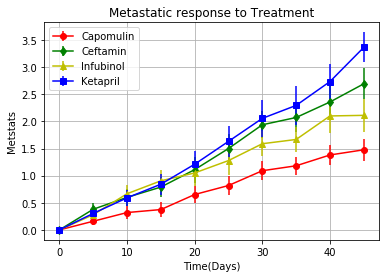

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate the Plot (with Error Bars)
x_axis = munged_metstat.index
cap_axis = munged_metstat['Capomulin'].values
#lineplot = plt.plot(x_axis, cap_axis, marker ='o', color='R', label="Capomulin")
cap_sem_axis=se_metstat_vol['Capomulin'].values

cef_axis = munged_metstat['Ceftamin'].values
#lineplot = plt.plot(x_axis, cef_axis, marker ='o', color='G', label="Ceftamin")
cef_sem_axis=se_metstat_vol['Ceftamin'].values

inf_axis = munged_metstat['Infubinol'].values
#lineplot = plt.plot(x_axis, inf_axis, marker ='o', color='Y', label="Infubinol")
inf_sem_axis=se_metstat_vol['Infubinol'].values

ket_axis = munged_metstat['Ketapril'].values
#lineplot = plt.plot(x_axis, ket_axis, marker ='o', color='B', label="Ketapril")
ket_sem_axis=se_metstat_vol['Ketapril'].values

#setting up the plot
fig, ax = plt.subplots()

ax.errorbar(x_axis,cap_axis, cap_sem_axis, marker ='o', color='R', label="Capomulin")
ax.errorbar(x_axis,cef_axis, cef_sem_axis, marker ='d', color='G', label="Ceftamin")
ax.errorbar(x_axis,inf_axis, inf_sem_axis, marker ='^', color='Y', label="Infubinol")
ax.errorbar(x_axis,ket_axis, ket_sem_axis, marker ='s', color='B', label="Ketapril")


# Adds a legend and sets its location to the upper left
plt.legend(loc="upper left")

# Add Title and labels to the x and y axes
plt.title("Metastatic response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Metstats")

# Set a grid on the plot
plt.grid()
plt.show()

# Save the Figure
plt.savefig("images/metastatic_response.png")


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric - I chose 30 percent)
survival_rate = (tumor_resp['Mouse ID'].count()/30)*100
# convert to dataframe
srv_data = survival_rate.to_frame()
# preview dataframe
srv_data.head()


Mouse ID
Drug      Timepoint           
Capomulin 0          83.333333
          5          83.333333
          10         83.333333
          15         80.000000
          20         76.666667

In [14]:
# Minor Data Munging to Re-Format the Data Frames
munged_survrate = srv_data.unstack(level = 'Drug')
# convert multi index to single index to get desired columns 
munged_survrate.columns = munged_survrate.columns.get_level_values(1)
munged_survrate = munged_survrate[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]
# Preview that Reformatting worked
munged_survrate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,86.666667,83.333333,86.666667,83.333333
5,83.333333,70.000000,83.333333,76.666667,76.666667,80.000000,83.333333,83.333333,83.333333,80.000000
10,83.333333,66.666667,70.000000,73.333333,70.000000,80.000000,76.666667,80.000000,76.666667,73.333333
15,80.000000,63.333333,70.000000,63.333333,70.000000,66.666667,56.666667,80.000000,76.666667,70.000000
20,76.666667,60.000000,66.666667,63.333333,66.666667,63.333333,56.666667,76.666667,70.000000,56.666667
25,73.333333,60.000000,60.000000,63.333333,60.000000,56.666667,46.666667,76.666667,63.333333,53.333333
30,73.333333,53.333333,56.666667,60.000000,50.000000,50.000000,43.333333,76.666667,60.000000,50.000000
35,73.333333,46.666667,40.000000,56.666667,50.000000,46.666667,33.333333,70.000000,53.333333,46.666667
40,70.000000,46.666667,33.333333,50.000000,50.000000,40.000000,30.000000,66.666667,40.000000,46.666667


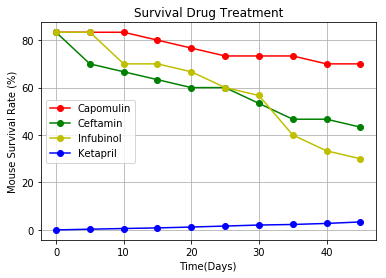

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate the Plot (with Error Bars)
# define x axis
x_axis = munged_survrate.index
# define y axis values for individual drug
cap_surv = munged_survrate['Capomulin'].values
# create the line plot for individual drug
lineplot = plt.plot(x_axis, cap_surv, marker ='o', color='R', label="Capomulin")

# define y axis values for individual drug
cef_surv = munged_survrate['Ceftamin'].values
# create the line plot for individual drug
lineplot = plt.plot(x_axis, cef_surv, marker ='o', color='G', label="Ceftamin")

# define y axis values for individual drug
inf_surv = munged_survrate['Infubinol'].values
# create the line plot for individual drug
lineplot = plt.plot(x_axis, inf_surv, marker ='o', color='Y', label="Infubinol")

# define y axis values for individual drug
ket_surv = munged_metstat['Ketapril'].values
# create the line plot for individual drug
lineplot = plt.plot(x_axis, ket_surv, marker ='o', color='B', label="Ketapril")


# Adds a legend and sets its location to the upper left
plt.legend(loc="best")

# Add Title and labels to the x and y axes
plt.title("Survival Drug Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Mouse Survival Rate (%)")

# Set a grid on the plot
plt.grid()
plt.show()

# Save the Figure
plt.savefig("images/survival_drug.png")

In [17]:
munged_data
summ_data = munged_data.iloc[:,0:4]
summ_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175
10,43.084291,48.285125,49.403909,49.582269
15,42.064317,50.094055,51.296397,52.399974
20,40.716325,52.157049,53.197691,54.920935
25,39.939528,54.287674,55.715252,57.678982
30,38.769339,56.769517,58.299397,60.994507
35,37.816839,58.827548,60.742461,63.371686
40,36.958001,61.467895,63.162824,66.068580


## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
# generating volume change using dataframe and forloop
volume_change = []
for i in summ_data.columns:
    change = ((summ_data.loc[45,i]-summ_data.loc[0,i])/summ_data.loc[0,i])*100
    volume_change.append(change)
#print volume change info to confirm
volume_change

[-19.475302667894173,
 42.516491855897414,
 46.12347172785184,
 57.028794686606076]

<Figure size 1440x3600 with 0 Axes>

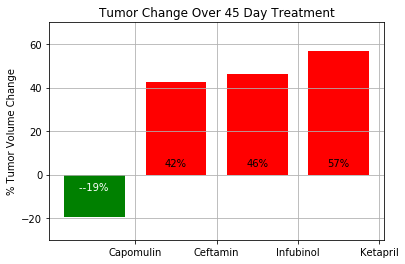

In [23]:
# Store all Relevant Percent Changes into a Tuple
volume_change

# Splice the data between passing and failing drugs
plt.figure(figsize = (20,50))
fig, barx = plt.subplots()
ind = np.arange(len(volume_change))  
width = 0.75
rectsPass = barx.bar(ind[0], volume_change[0], width, color='g' )
rectsFail = barx.bar(ind[1:], volume_change[1:], width, color='r')

# Orient widths. Add labels, tick marks, etc. 
barx.set_ylabel('% Tumor Volume Change')
barx.set_title('Tumor Change Over 45 Day Treatment')
barx.set_xticks(ind +.5)
barx.set_xticklabels(munged_data.columns)
barx.set_autoscaley_on(False)
barx.set_ylim([-30,70])
barx.grid(True)

# Use functions to label the percentages of changes. I have copied this function from Stackoverflow hope it is ok
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        barx.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="black")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        barx.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
plt.savefig("images/tumor_change.png")
# Show the Figure
fig.show()